# 🏗️ Notebook B: Final Meme Assembly

Welcome to the final part of your Meme Generator lab! 🎉

In this notebook, you'll combine your selected image with your meme text to create the final meme image. We'll bring together the text caption you generated using an LLM, and the image you selected after searching OpenCLIP for the most suitable match for that caption.

Let's get started by importing the necessary libraries we'll use in this notebook to bring it all together.

In [13]:
import json
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
from pathlib import Path
import textwrap

✅ Your selected meme caption: A hotdog in the stands is a home run in the stomach!

✅ Selected image loaded from: ../images/Sad-Pablo-Escobar.jpg


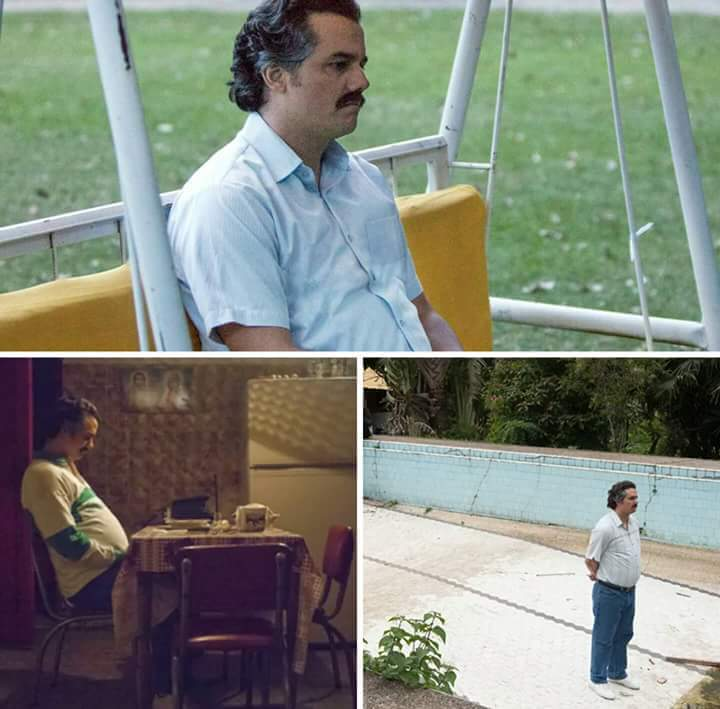

In [ ]:
"""
This cell loads the selections you made in the previous parts of the lab:
- Your chosen meme text from `captions.json`
- The image path you selected from `selected_image.json`
"""

# Load caption from the "Selected Caption" file we created in Notebook A
with open("../selected_caption.json", "r") as f:
    caption = json.load(f)

# Get the first (and only) caption from the file:
selected_caption = caption

print(f"✅ Your selected meme caption: {selected_caption}\n")

# Load selected image
with open("../selected_image.json", "r") as f:
    selected_image_path = json.load(f)

print(f"✅ Selected image loaded from: {selected_image_path}")

# Display selected image
from PIL import Image
img = Image.open(selected_image_path)
display(img)

## Generate the final "Meme Product"

This next cell overlays the selected caption "meme text" onto your chosen image. 
- You can customize the font size and position below w/in this cell using the various code snippets; only uncomment 1 at a time to move the text around. 

In this lab:
- We've added a dynamic font sizing system that scales text based on the image size.
- If **Impact.ttf** is missing, we fall back to the default font.
- You can change the font file and size in the `create_meme()` function!


#### Example: How is the text centered on the image?

We calculate the leftover space on each axis by subtracting the text size from the image size, then divide by 2. 

For example, the code:

    `position = ((image.width - text_width) // 2, (image.height - text_height) // 2)`

finds the horizontal (x) and vertical (y) center points. This is a common approach in pixel-based graphics.

In [16]:
# Function to create meme and save to your working directory
def create_meme(image_path, text, output_path="../my_final_meme.png"):
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)

    # Load Impact font with dynamic sizing
    font_path = "../fonts/impact.ttf" # gotta have that classic meme font
    font_size = int(image.height * 0.08) # Dynamic sizing option
    try:
        font = ImageFont.truetype(font_path, font_size)
    except:
        print("Impact font not found! Using default font instead.")
        font = ImageFont.load_default()

    # Wrap text to fit within the image width
    max_chars_per_line = int(image.width / (font_size * 0.6))
    wrapped_text = textwrap.fill(text, width=max_chars_per_line)

    # Measure wrapped text size
    text_width, text_height = draw.multiline_textsize(wrapped_text, font=font)
    # Position text at center of image
    position = ((image.width - text_width) // 2, (image.height - text_height) // 2)

    # --- More examples for moving/resizing text: ---

    # Text position: centered at bottom
    # position = ((image.width - text_width) // 2, image.height - text_height - 20)

    # Top center
    # position = ((image.width - text_width) // 2, 20)

    # Bottom right corner
    # position = (image.width - text_width - 20, image.height - text_height - 20)

    # Bottom left corner
    # position = (20, image.height - text_height - 20)

    # Change font size (e.g., larger text)
    # font = ImageFont.truetype("arial.ttf", 48) # Set a fixed font size
    # text_width, text_height = draw.textsize(text, font=font)
    # position = ((image.width - text_width) // 2, image.height - text_height - 20)

    # Draw outline for visibility
    outline_color = "black"
    for x in [-2, 0, 2]:
        for y in [-2, 0, 2]:
            draw.multiline_text((position[0] + x, position[1] + y), wrapped_text, font=font, fill=outline_color, align="center")

    # Main text
    draw.multiline_text(position, wrapped_text, font=font, fill="white", align="center")

    image.save(output_path)
    print(f"✅ Meme saved to {output_path}")
    display(image)

# Button to generate meme
generate_button = widgets.Button(description="Create My Meme!")
output = widgets.Output()


def on_generate_click(b):
    output.clear_output()
    with output:
        create_meme(selected_image_path, selected_caption)


generate_button.on_click(on_generate_click)
display(generate_button, output)

Button(description='Create My Meme!', style=ButtonStyle())

Output()